In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#loading the csv data to a Pandas DataFrame
gold = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows in the dataframe
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows of the dataframe
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and coloumns
gold.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statistical measures of the data
gold.describe()
correlation = gold.corr()

<ipython-input-11-fcd901d6dd02>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold.corr()


<Axes: >

<Figure size 800x800 with 0 Axes>

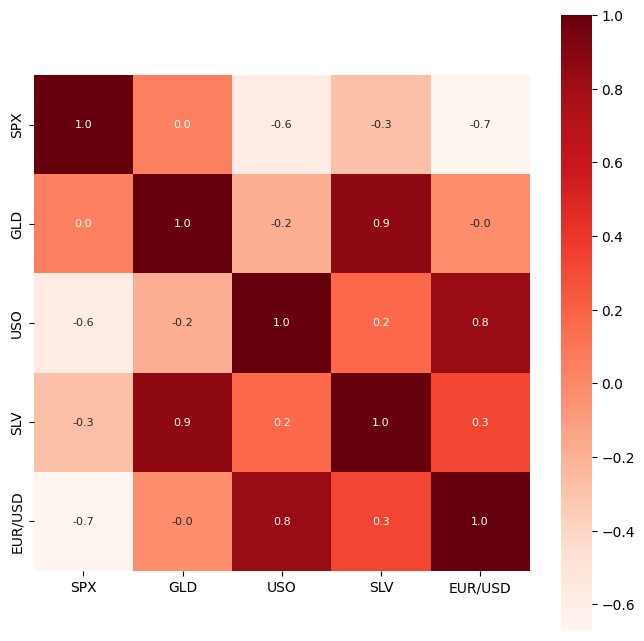

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize =(8,8))
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
           annot=True, annot_kws={'size':8},cmap='Reds')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


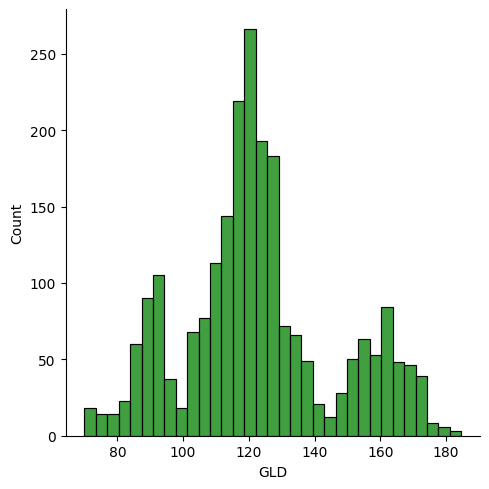

In [ ]:
#checking the distribution of the gold price
sns.displot(gold['GLD'],color='green')

In [ ]:
#Splitting the Features and Targets
X = gold.drop(['Date','GLD'],axis=1)
Y = gold['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#Splitting into Training Data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [ ]:
#Model Training : Random Forest Algorithm
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Model Evaluation
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[113.09100051 149.20430076 142.96469827 112.53030197 113.85749966
  95.58619956 111.76399982  93.55829997 120.4645006  127.40360005
 148.3127998  120.55489865 118.98190059  88.25210069  96.19600016
  92.67669851 116.38490043  89.08129901 125.19530148 114.99200026
 119.24699939 153.10080121 122.52349792 119.91690004 171.06909929
 108.17939876 120.78040104  87.27969899  87.6673007   88.39349926
 121.42430056 154.52860145 149.11509844 126.45659961 126.58520008
  90.79499907 158.9053999  121.38330205 106.74040074 144.51509722
  92.50969972 127.58320115 117.6864011  152.2903013  119.48779959
  91.25800169  78.41800038 120.39100195 133.2663007  119.16509971
 127.18550063 165.82100067 153.57800066  92.56829936 149.18250019
 151.67989849 113.55550141 112.92450054  87.08469898 127.65669943
 125.18740119 152.04400288 114.11509958 110.67849991 161.02239705
 117.24979913 108.61040082 132.12610004 132.99680164 125.26550005
 117.05810001 149.06970166 156.01249933 168.62579523 110.22940089
 140.81099

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9930832379275326


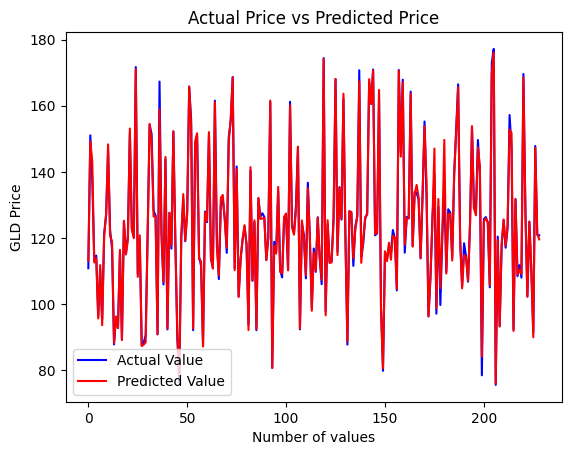

In [ ]:
#Compare the Actual Values and Predicted Values in a Plot
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()